State Farm Distracted Drivers
=============

Prev Exercises: Udacity:DeepLearning:TensorFlow:notMNIST  

Fit Logistic Regression (TensorFlow)
------------

In [1]:
import pprint
import sys
print sys.version

2.7.11 (default, Jan 28 2016, 14:07:46) 
[GCC 4.2.1 Compatible Apple LLVM 7.0.2 (clang-700.1.81)]


In [128]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import tensorflow as tf
print 'tf.__version__:%s' % str(tf.__version__)
from six.moves import cPickle as pickle
from six.moves import range
import math
from IPython.display import display, Image

tf.__version__:0.8.0


## Analytics Specs

### This Project

In [3]:
%run img_glbSpec_SFDD.py

imported img_glbSpec_SFDD


In [4]:
print '\nglbRspClass: %s' % (glbRspClass)
print 'glbRspClassN: %d' % (glbRspClassN)
print 'glbRspClassDesc: '; print(glbRspClassDesc)

print '\nglbImg:'; print(glbImg)

print '\nglbTfVarSeed: %d' % (glbTfVarSeed)

print '\nglbPickleFile: %s' % (glbPickleFile)


glbRspClass: ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
glbRspClassN: 10
glbRspClassDesc: 
{'c9': 'talking to passenger', 'c8': 'hair and makeup', 'c3': 'texting - left', 'c2': 'talking on the phone - right', 'c1': 'texting - right', 'c0': 'normal driving', 'c7': 'reaching behind', 'c6': 'drinking', 'c5': 'operating the radio', 'c4': 'talking on the phone - left'}

glbImg:
{'color': False, 'pxlDepth': 255.0, 'size': 32}

glbTfVarSeed: 131

glbPickleFile: {'models': 'data/img_M_SFDD_ImgSz_32.pickle', 'data': 'data/img_D_SFDD_ImgSz_32.pickle'}


## Import Data

### This Project

In [5]:
with open(glbPickleFile['data'], 'rb') as f:
  save = pickle.load(f)

  glbObsFitIdn = save['glbObsFitIdn']
  glbObsFitFtr = save['glbObsFitFtr']
  glbObsFitRsp = save['glbObsFitRsp']

  glbObsVldIdn = save['glbObsVldIdn']
  glbObsVldFtr = save['glbObsVldFtr']
  glbObsVldRsp = save['glbObsVldRsp']

  glbObsTrnIdn = save['glbObsTrnIdn']
  glbObsTrnFtr = save['glbObsTrnFtr']
  glbObsTrnRsp = save['glbObsTrnRsp']

  glbObsNewIdn = save['glbObsNewIdn']
  glbObsNewFtr = save['glbObsNewFtr']
  glbObsNewRsp = save['glbObsNewRsp']

  del save  # hint to help gc free up memory
    
  print('Fit set:', len(glbObsFitIdn), glbObsFitFtr.shape, glbObsFitRsp.shape)
  print('Vld set:', len(glbObsVldIdn), glbObsVldFtr.shape, glbObsVldRsp.shape)
  print('Trn set:', len(glbObsTrnIdn), glbObsTrnFtr.shape, glbObsTrnRsp.shape)    
  print('New set:', len(glbObsNewIdn), glbObsNewFtr.shape, glbObsNewRsp.shape)

('Fit set:', 17940, (17940, 32, 32), (17940,))
('Vld set:', 4484, (4484, 32, 32), (4484,))
('Trn set:', 22424, (22424, 32, 32), (22424,))
('New set:', 79726, (79726, 32, 32), (79726,))


First reload the data we generated in `1_notmist.ipynb`.

In [7]:
# pickle_file = 'data/notMNIST.pickle'

# with open(pickle_file, 'rb') as f:
#   save = pickle.load(f)
#   glbObsFitFtr = save['glbObsFitFtr']
#   glbObsFitRsp = save['glbObsFitRsp']
#   glbObsVldFtr = save['glbObsVldFtr']
#   glbObsVldRsp = save['glbObsVldRsp']
#   glbObsNewFtr = save['glbObsNewFtr']
#   glbObsNewRsp = save['glbObsNewRsp']
#   del save  # hint to help gc free up memory
#   print('Training set', glbObsFitFtr.shape, glbObsFitRsp.shape)
#   print('Validation set', glbObsVldFtr.shape, glbObsVldRsp.shape)
#   print('Test set', glbObsNewFtr.shape, glbObsNewRsp.shape)

Reformat into a shape that's more adapted to the models we're going to train:
- data as a flat matrix,
- labels as float 1-hot encodings.

In [6]:
def myreformatData(dataset, labels):
  dataset = dataset.reshape((-1, glbImg['size'] * glbImg['size'])).astype(np.float32)
  # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
  labels = (np.arange(glbRspClassN) == labels[:,None]).astype(np.float32)
  return dataset, labels

glbObsTrnFtr, glbObsTrnRsp = myreformatData(glbObsTrnFtr, glbObsTrnRsp)
glbObsFitFtr, glbObsFitRsp = myreformatData(glbObsFitFtr, glbObsFitRsp)
glbObsVldFtr, glbObsVldRsp = myreformatData(glbObsVldFtr, glbObsVldRsp)
glbObsNewFtr, glbObsNewRsp = myreformatData(glbObsNewFtr, glbObsNewRsp)

print('Trn set', glbObsTrnFtr.shape, glbObsTrnRsp.shape)
print('Fit set', glbObsFitFtr.shape, glbObsFitRsp.shape)
print('Vld set', glbObsVldFtr.shape, glbObsVldRsp.shape)
print('New set', glbObsNewFtr.shape, glbObsNewRsp.shape)

('Trn set', (22424, 1024), (22424, 10))
('Fit set', (17940, 1024), (17940, 10))
('Vld set', (4484, 1024), (4484, 10))
('New set', (79726, 1024), (79726, 10))


In [9]:
# glbImg['size'] = 28
# glbRspClassN = 10

# def reformat(dataset, labels):
#   dataset = dataset.reshape((-1, glbImg['size'] * glbImg['size'])).astype(np.float32)
#   # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
#   labels = (np.arange(glbRspClassN) == labels[:,None]).astype(np.float32)
#   return dataset, labels
# glbObsFitFtr, glbObsFitRsp = reformat(glbObsFitFtr, glbObsFitRsp)
# glbObsVldFtr, glbObsVldRsp = reformat(glbObsVldFtr, glbObsVldRsp)
# glbObsNewFtr, glbObsNewRsp = reformat(glbObsNewFtr, glbObsNewRsp)
# print('Training set', glbObsFitFtr.shape, glbObsFitRsp.shape)
# print('Validation set', glbObsVldFtr.shape, glbObsVldRsp.shape)
# print('Test set', glbObsNewFtr.shape, glbObsNewRsp.shape)

## Fit Logistic Regression (TensorFlow)

We're first going to train a multinomial logistic regression using simple gradient descent.

TensorFlow works like this:
* First you describe the computation that you want to see performed: what the inputs, the variables, and the operations look like. These get created as nodes over a computation graph. This description is all contained within the block below:

      with graph.as_default():
          ...

* Then you can run the operations on this graph as many times as you want by calling `session.run()`, providing it outputs to fetch from the graph that get returned. This runtime operation is all contained in the block below:

      with tf.Session(graph=graph) as session:
          ...

Let's load all the data into TensorFlow and build the computation graph corresponding to our training:

In [7]:
def mydspVerboseTrigger(ix):
    return(
            ((ix >= 100000) and                   (ix % 200000 == 0)) or \
            ((ix >= 10000 ) and (ix < 100000) and (ix % 20000  == 0)) or \
            ((ix >= 1000  ) and (ix < 10000 ) and (ix % 2000   == 0)) or \
            ((ix >= 100   ) and (ix < 1000  ) and (ix % 200    == 0)) or \
            ((ix >= 10    ) and (ix < 100   ) and (ix % 20     == 0)) or \
            ((ix >= 1     ) and (ix < 10    ) and (ix % 2      == 0)) or \
             (ix ==  0    )
          )

In [8]:
from datetime import datetime, time
import pandas as pd
from sklearn import metrics as skmetrics

In [28]:
# With gradient descent training, even this much data is prohibitive.
# Subset the training data for faster turnaround.

def fitMdlLgtRgrTfw(lclObsFitFtr, lclObsFitRsp, nObsFit = 50, nStepsTfw = 11, 
                    verbose = False):
    print('\nLogistic Regression (TensorFlow): nObsFit:%5d; nStepsTfw:%5d' % ( \
            nObsFit, nStepsTfw))
    
    startTm = datetime.now()

    mdlDf = pd.DataFrame({'id': 'LogisticRegression.tf',
                            'nObsFit'  : [nObsFit],
                            'nStepsTfw': [nStepsTfw]
                         })
    
    graph = tf.Graph()
    with graph.as_default():

      # Input data.
      # Load the training, validation and test data into constants that are
      # attached to the graph.
      tfwObsFitFtr = tf.constant(lclObsFitFtr[:nObsFit, :])
      tfwObsFitRsp = tf.constant(lclObsFitRsp[:nObsFit])
      tfwObsVldFtr = tf.constant(glbObsVldFtr)
      tfwObsVldRsp = tf.constant(glbObsVldRsp)        
      tfwObsNewFtr = tf.constant(glbObsNewFtr)
      tfwObsNewRsp = tf.constant(glbObsNewRsp)        

      # Variables.
      tf.set_random_seed(glbTfVarSeed)
    
      # These are the parameters that we are going to be training. The weight
      # matrix will be initialized using random valued following a (truncated)
      # normal distribution. The biases get initialized to zero.
      weights = tf.Variable(
        tf.truncated_normal([glbImg['size'] * glbImg['size'], glbRspClassN]), name = 'weights')
      biases = tf.Variable(tf.zeros([glbRspClassN]), name = 'biases')
      if (verbose):  
          print 'weights:'; print(weights.initialized_value())
          print ' biases:'; print(biases.initialized_value())
    #     print 'lblIx:%2d:%s'% (np.vectorize("%.4e".__mod__)(weights.value()[:5, lblIx]))

      # Training computation.
      # We multiply the inputs with the weight matrix, and add biases. We compute
      # the softmax and cross-entropy (it's one operation in TensorFlow, because
      # it's very common, and it can be optimized). We take the average of this
      # cross-entropy across all training examples: that's our loss.
      logits = tf.matmul(tfwObsFitFtr, weights) + biases
      loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits, tfwObsFitRsp))

      # Optimizer.
      # We are going to find the minimum of this loss using gradient descent.
      optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

      # Predictions for the training, validation, and test data.
      # These are not part of training, but merely here so that we can report
      # accuracy_score figures as we train.
      tfwObsFitRspPredProba = tf.nn.softmax(logits)
      tfwObsVldRspPredProba = tf.nn.softmax(tf.matmul(tfwObsVldFtr, weights) + biases)
      tfwObsNewRspPredProba = tf.nn.softmax(tf.matmul(tfwObsNewFtr, weights) + biases)
    
    def accuracy_score(predictions, labels):
      return (1.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
              / predictions.shape[0])

    with tf.Session(graph=graph) as session:
      # This is a one-time operation which ensures the parameters get initialized as
      # we described in the graph: random weights for the matrix, zeros for the
      # biases. 
      tf.initialize_all_variables().run()
      if verbose:
          print('Initialized')
        
      for step in range(nStepsTfw):
        # Run the computations. We tell .run() that we want to run the optimizer,
        # and get the loss value and the training predictions returned as numpy
        # arrays.
        _, l, predictions = \
            session.run([optimizer, loss, tfwObsFitRspPredProba])
        if mydspVerboseTrigger(step):
          print('Loss at step %d: %.4f (%d secs)' % \
                (step, l, (datetime.now() - startTm).seconds))
        
#           print '  predictions:'; 
#           print type(predictions); print predictions.shape; 
#           print predictions[:5, :]
#           print '  tfwObsFitRsp:'; 
#           print type(tfwObsFitRsp); print tfwObsFitRsp.get_shape(); 
#           print tfwObsFitRsp.eval()[:5, :]
      accFit = accuracy_score(tfwObsFitRspPredProba.eval(), 
                              tfwObsFitRsp.eval()[:nObsFit, :])
      logLossFit = skmetrics.log_loss(tfwObsFitRsp.eval()[:nObsFit, :], 
                                                    tfwObsFitRspPredProba.eval())    
      print 'accFit:%.4f; logLossFit:%.4f' % (accFit, logLossFit)    

          # Calling .eval() on tfwObsVldPred is basically like calling run(), but
          # just to get that one numpy array. Note that it recomputes all its graph
          # dependencies.

#       nChkObs = 100        
#       print 'nChkObs: %d' % (nChkObs)
#       print 'tfwObsVldRspPredProba.eval():'  
#       print np.array_str(tfwObsVldRspPredProba.eval()[:nChkObs, :], 
#                          precision=4, suppress_small=True)
#       print 'tfwObsVldRsp.eval():'  
#       print tfwObsVldRsp.eval()[:nChkObs, :]    
#       print 'accuracy comparisons:'  
#       print (np.argmax(tfwObsVldRspPredProba.eval(), 1) == 
#              np.argmax(tfwObsVldRsp.eval(), 1))[:nChkObs]
#       print 1.0 * np.sum((np.argmax(tfwObsVldRspPredProba.eval(), 1) == 
#              np.argmax(tfwObsVldRsp.eval(), 1))[:nChkObs]) / nChkObs
      mdlDf['accVld'] = accVld = accuracy_score(tfwObsVldRspPredProba.eval(), 
                                                    tfwObsVldRsp.eval())
      mdlDf['logLossVld'] = logLossVld = skmetrics.log_loss(tfwObsVldRsp.eval(), 
                                                    tfwObsVldRspPredProba.eval())    
      print 'accVld:%.4f; logLossVld:%.4f' % (accVld, logLossVld)
            
      lclObsNewRspPredProba = tfwObsNewRspPredProba.eval()  
      #if (tfwObsNewRsp.eval() > -1).any():
      if (len(np.unique(tfwObsNewRsp.eval(), return_counts = True)[0]) > 1):        
          if verbose:      
              print('accNew:%.4f' % 
                    accuracy_score(tfwObsNewRspPredProba.eval(), tfwObsNewRsp.eval()))

      clsKntDct = {'clsKnt' : np.unique(np.argmax(tfwObsNewRspPredProba.eval(), 1), 
                                        return_counts = True)}
      mdlDf['predNew'] = None
      mdlDf.set_value(0, 'predNew', clsKntDct)
      #print type(clsKntDct)
      if verbose:
          print '\n  New prediction knts:'
          print mdlDf['predNew'][0]
            
    mdlDf['model'] = graph
    mdlDf['elapsedSecs'] = (datetime.now() - startTm).seconds  
    print('  elapsed: %.2d seconds' % (mdlDf['elapsedSecs'][0]))  
    
    return(mdlDf, lclObsNewRspPredProba)

mdlDf = pd.DataFrame()
thsDf, thsObsNewRspPredProba = fitMdlLgtRgrTfw(glbObsFitFtr, glbObsFitRsp, 
                        nObsFit = 100, nStepsTfw = 10, 
                        verbose = True)
print 'thsObsNewRspPredProba:'  
print np.array_str(thsObsNewRspPredProba[:5, :], 
                         precision=4, suppress_small=True)

mdlDf = mdlDf.append(thsDf)
thsDf, _ = fitMdlLgtRgrTfw(glbObsFitFtr, glbObsFitRsp, 
                        nObsFit = 100, nStepsTfw = 10, 
                        verbose = False)
mdlDf = mdlDf.append(thsDf)

# mdlDf = mdlDf.append(fitMdlLgtRgrTfw(glbObsFitFtr, glbObsFitRsp, 
#                         nObsFit = 100, nStepsTfw = 100, 
#                         verbose = False))
# mdlDf = mdlDf.append(fitMdlLgtRgrTfw(glbObsFitFtr, glbObsFitRsp, 
#                         nObsFit = 100, nStepsTfw = 1000, 
#                         verbose = True))
# mdlDf = mdlDf.append(fitMdlLgtRgrTfw(glbObsFitFtr, glbObsFitRsp, 
#                         nObsFit = 100, nStepsTfw = 10000, 
#                         verbose = False))
print '\nmdlDf: '
print(mdlDf)


Logistic Regression (TensorFlow): nObsFit:  100; nStepsTfw:   10
weights:
Tensor("Identity:0", shape=(1024, 10), dtype=float32)
 biases:
Tensor("Identity_1:0", shape=(10,), dtype=float32)
Initialized
Loss at step 0: 12.112212
Loss at step 2: 6.915408
Loss at step 4: 5.491863
Loss at step 6: 5.145919
Loss at step 8: 4.630432
accFit:0.1400; logLossFit:4.4975
accVld:0.1195; logLossVld:6.0197

  New prediction knts:
{'clsKnt': (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([36706,  7157, 13023,  1649,  3731,  1484,  3769,  4636,  3262,  4309]))}
  elapsed: 06 seconds
thsObsNewRspPredProba:
[[ 0.0029  0.      0.0345  0.      0.      0.9577  0.0002  0.0002  0.0045
   0.    ]
 [ 0.0001  0.      0.4741  0.      0.1457  0.3073  0.0521  0.      0.0196
   0.0011]
 [ 0.3854  0.      0.6057  0.0014  0.      0.0001  0.0013  0.      0.0031
   0.0028]
 [ 0.3733  0.0001  0.5269  0.      0.0001  0.0001  0.      0.0067  0.0929
   0.    ]
 [ 0.8179  0.0761  0.0132  0.0009  0.0678  0.0068  0.0033  0.0006  

In [9]:
try:
    glbMdlDf = pd.read_pickle(glbPickleFile['models'])
except IOError, e:
    print(e)    
    if e.errno == 2:    
        glbMdlDf = pd.DataFrame()
    else:
        raise

glbMdlDf['id'] = 'LogisticRegression.sklearn'
print(glbMdlDf)

                                                accVld  elapsedSecs  \
id                         nObsFit nStepsTfw                          
LogisticRegression.sklearn 22424   NaN        0.983943          238   
LogisticRegression.tf      17940   20000      0.000000         2898   
                           10000   20000      0.000000         1696   
LogisticRegression.sklearn 17940   NaN        0.969670          166   
LogisticRegression.tf      17940   10000      0.000000         1411   
                           10000   10000      0.000000          801   
LogisticRegression.sklearn 10000   NaN        0.956512           83   
                           5000    NaN        0.936664           37   
LogisticRegression.tf      17940   1000       0.000000          148   
                           10000   1000       0.000000           85   
LogisticRegression.sklearn 1000    NaN        0.836084            6   
                                   10000      0.000000          187   
Logist

In [103]:
print glbMdlDf['bstFit'].isnull()

id                          nObsFit  nStepsTfw
LogisticRegression.tf       22424    20000         True
LogisticRegression.sklearn  22424    NaN          False
                            17940    20000        False
                            10000    20000        False
                            17940    NaN          False
                                     10000        False
                            10000    10000        False
                                     NaN          False
                            5000     NaN          False
                            17940    1000         False
                            10000    1000         False
                            1000     NaN          False
                                     10000        False
                                     20000        False
                                     1000         False
                            100      NaN          False
                            10000    100          False
 

In [105]:
def mydspMdls(lclMdlDf):
    lclMdlDf.ix[lclMdlDf['bstFit'].isnull(), 'bstFit'] = False
    lclMdlDf = (lclMdlDf
                .set_index(['id', 'nObsFit', 'nStepsTfw'], 
                           drop = False)
                .sort_values(['logLossVld', 'accVld'], ascending = 
                             ['True'      , 'False' ])
                )
    print(lclMdlDf)
    return(lclMdlDf)

tmpMdlDf = mydspMdls(glbMdlDf)

                                                accVld bstFit  elapsedSecs  \
id                         nObsFit nStepsTfw                                 
LogisticRegression.tf      22424   20000      0.980375  False         3533   
LogisticRegression.sklearn 22424   NaN        0.983943  False          238   
                           17940   20000      0.000000   True         2898   
                           10000   20000      0.000000  False         1696   
                           17940   NaN        0.969670  False          166   
                                   10000      0.000000  False         1411   
                           10000   10000      0.000000  False          801   
                                   NaN        0.956512  False           83   
                           5000    NaN        0.936664  False           37   
                           17940   1000       0.000000  False          148   
                           10000   1000       0.000000  False   

/usr/local/lib/python2.7/site-packages/ipykernel/kernelbase.py:370: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


In [11]:
#glbMdlDf = glbMdlDf.append(mdlDf)
glbMdlDf = mydspMdls(glbMdlDf)

                                                accVld  elapsedSecs  \
id                         nObsFit nStepsTfw                          
LogisticRegression.sklearn 22424   NaN        0.983943          238   
                           17940   20000      0.000000         2898   
                           10000   20000      0.000000         1696   
                           17940   NaN        0.969670          166   
                                   10000      0.000000         1411   
                           10000   10000      0.000000          801   
                                   NaN        0.956512           83   
                           5000    NaN        0.936664           37   
                           17940   1000       0.000000          148   
                           10000   1000       0.000000           85   
                           1000    NaN        0.836084            6   
                                   10000      0.000000          187   
      

In [57]:
# print glbMdlDf.columns
# print glbMdlDf['nObsFit']
# #print glbMdlDf['nStepsTfW']
# #print np.isnan(glbMdlDf['nStepsTfW'])

In [4]:
# # With gradient descent training, even this much data is prohibitive.
# # Subset the training data for faster turnaround.
# nObsFit = 10000

# graph = tf.Graph()
# with graph.as_default():

#   # Input data.
#   # Load the training, validation and test data into constants that are
#   # attached to the graph.
#   tfwObsFitFtr = tf.constant(glbObsFitFtr[:nObsFit, :])
#   tfwObsFitRsp = tf.constant(glbObsFitRsp[:nObsFit])
#   tfwObsVldFtr = tf.constant(glbObsVldFtr)
#   tfwObsNewFtr = tf.constant(glbObsNewFtr)
  
#   # Variables.
#   # These are the parameters that we are going to be training. The weight
#   # matrix will be initialized using random valued following a (truncated)
#   # normal distribution. The biases get initialized to zero.
#   weights = tf.Variable(
#     tf.truncated_normal([glbImg['size'] * glbImg['size'], glbRspClassN]), name = 'weights')
#   biases = tf.Variable(tf.zeros([glbRspClassN]), name = 'biases')
#   print(weights.initialized_value())
#   print(biases.initialized_value())
# #   print 'initial  biases:%s' % (np.vectorize("%.4e".__mod__)(tf.get_variable('biases')))
# #   print 'initial weights (first 5 only):' 
# #   for lblIx in xrange(glbRspClassN):
# #     print 'lblIx:%2d:%s'% (np.vectorize("%.4e".__mod__)(weights.value()[:5, lblIx]))
  
#   # Training computation.
#   # We multiply the inputs with the weight matrix, and add biases. We compute
#   # the softmax and cross-entropy (it's one operation in TensorFlow, because
#   # it's very common, and it can be optimized). We take the average of this
#   # cross-entropy across all training examples: that's our loss.
#   logits = tf.matmul(tfwObsFitFtr, weights) + biases
#   loss = tf.reduce_mean(
#     tf.nn.softmax_cross_entropy_with_logits(logits, tfwObsFitRsp))
  
#   # Optimizer.
#   # We are going to find the minimum of this loss using gradient descent.
#   optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
#   # Predictions for the training, validation, and test data.
#   # These are not part of training, but merely here so that we can report
#   # accuracy_score figures as we train.
#   tfwObsTrnPred = tf.nn.softmax(logits)
#   tfwObsVldPred = tf.nn.softmax(
#     tf.matmul(tfwObsVldFtr, weights) + biases)
#   tfwObsNewPred = tf.nn.softmax(tf.matmul(tfwObsNewFtr, weights) + biases)

Tensor("Identity:0", shape=TensorShape([Dimension(784), Dimension(10)]), dtype=float32)
Tensor("Identity_1:0", shape=TensorShape([Dimension(10)]), dtype=float32)


Let's run this computation and iterate:

In [58]:
# nStepsTfw = 801

# def accuracy_score(predictions, labels):
#   return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
#           / predictions.shape[0])

# with tf.Session(graph=graph) as session:
#   # This is a one-time operation which ensures the parameters get initialized as
#   # we described in the graph: random weights for the matrix, zeros for the
#   # biases. 
#   tf.initialize_all_variables().run()
#   print('Initialized')
#   for step in range(nStepsTfw):
#     # Run the computations. We tell .run() that we want to run the optimizer,
#     # and get the loss value and the training predictions returned as numpy
#     # arrays.
#     _, l, predictions = session.run([optimizer, loss, tfwObsTrnPred])
#     if (step % 100 == 0):
#       print('Loss at step %d: %f' % (step, l))
#       print('Training accuracy_score: %.1f%%' % accuracy_score(
#         predictions, glbObsFitRsp[:nObsFit, :]))
#       # Calling .eval() on tfwObsVldPred is basically like calling run(), but
#       # just to get that one numpy array. Note that it recomputes all its graph
#       # dependencies.
#       print('Validation accuracy_score: %.1f%%' % accuracy_score(
#         tfwObsVldPred.eval(), glbObsVldRsp))
#   print('Test accuracy_score: %.1f%%' % accuracy_score(tfwObsNewPred.eval(), glbObsNewRsp))

In [35]:
nObsFitSearch = [100, 1000, 10000, glbObsFitFtr.shape[0]]
#nObsFitSearch = [100, 1000, 5000, 10000, glbObsFitFtr.shape[0]]
nStepsTfwSearch = [20000]
#nStepsTfwSearch = [100, 1000]
#nStepsTfwSearch = [100, 1000, 10000]

for nObsFit in nObsFitSearch:
    for nStepsTfw in nStepsTfwSearch:
        if (glbMdlDf.shape[0] == 0) or \
           (glbMdlDf[
                    (glbMdlDf.nObsFit   == nObsFit  ) &
                    (glbMdlDf.nStepsTfw == nStepsTfw)
                    ].shape[0] == 0):
            mdlDf = fitMdlLgtRgrTfw(glbObsFitFtr, glbObsFitRsp, 
                            nObsFit = nObsFit, nStepsTfw = nStepsTfw, 
                            verbose = False)
            glbMdlDf = glbMdlDf.append(mdlDf)  


Logistic Regression (TensorFlow): nObsFit:  100; nStepsTfw:20000
Loss at step 0: 12.112212
Loss at step 2: 6.915408
Loss at step 4: 5.491863
Loss at step 6: 5.145919
Loss at step 8: 4.630432
Loss at step 20: 3.738067
Loss at step 40: 2.010716
Loss at step 60: 1.462729
Loss at step 80: 1.134304
Loss at step 200: 0.134106
Loss at step 400: 0.057926
Loss at step 600: 0.037097
Loss at step 800: 0.027338
Loss at step 2000: 0.010700
Loss at step 4000: 0.005360
Loss at step 6000: 0.003588
Loss at step 8000: 0.002702
accFit:1.0000; logLossFit:0.0011
accVld:0.0000; logLossVld:5.0527
  elapsed: 260 seconds

Logistic Regression (TensorFlow): nObsFit: 1000; nStepsTfw:20000
Loss at step 0: 11.311281
Loss at step 2: 7.000154
Loss at step 4: 5.837600
Loss at step 6: 5.454427
Loss at step 8: 5.163519
Loss at step 20: 4.300428
Loss at step 40: 3.467466
Loss at step 60: 3.046890
Loss at step 80: 2.700103
Loss at step 200: 1.706919
Loss at step 400: 0.912455
Loss at step 600: 0.591259
Loss at step 800: 

In [106]:
glbMdlDf = mydspMdls(glbMdlDf)

                                                accVld bstFit  elapsedSecs  \
id                         nObsFit nStepsTfw                                 
LogisticRegression.tf      22424   20000      0.980375  False         3533   
LogisticRegression.sklearn 22424   NaN        0.983943  False          238   
                           17940   20000      0.000000   True         2898   
                           10000   20000      0.000000  False         1696   
                           17940   NaN        0.969670  False          166   
                                   10000      0.000000  False         1411   
                           10000   10000      0.000000  False          801   
                                   NaN        0.956512  False           83   
                           5000    NaN        0.936664  False           37   
                           17940   1000       0.000000  False          148   
                           10000   1000       0.000000  False   

In [107]:
def mysaveMdls():
    import os
    
    try:
        glbMdlDf.drop('model', axis = 1).to_pickle(glbPickleFile['models'])
    except Exception, e:
        print(e)    
        raise

    print 'Compressed pickle file: %s; size: %d KB'% (glbPickleFile['models'], 
                            os.stat(glbPickleFile['models']).st_size / 1024)
    
mysaveMdls()    

Compressed pickle file: data/img_M_SFDD_ImgSz_32.pickle; size: 8 KB


In [59]:
logLossVldBst = np.min(glbMdlDf[glbMdlDf['nObsFit'] <= 
                                glbObsFitFtr.shape[0]]['logLossVld'])
# print logLossVldBst
glbMdlDf['bstFit'] = False
# print(glbMdlDf['logLossVld'] == logLossVldBst)
glbMdlDf.ix[glbMdlDf['logLossVld'] == logLossVldBst, 'bstFit'] = True
# print glbMdlDf
print 'Selected Model:'
print glbMdlDf[glbMdlDf['bstFit'] == True]

Selected Model:
                                              accVld  elapsedSecs  \
id                         nObsFit nStepsTfw                        
LogisticRegression.sklearn 17940   20000           0         2898   

                                                                      id  \
id                         nObsFit nStepsTfw                               
LogisticRegression.sklearn 17940   20000      LogisticRegression.sklearn   

                                              logLossVld  nObsFit  nStepsTfw  \
id                         nObsFit nStepsTfw                                   
LogisticRegression.sklearn 17940   20000        0.160944    17940      20000   

                                                                                        predNew  \
id                         nObsFit nStepsTfw                                                      
LogisticRegression.sklearn 17940   20000      {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   

        

In [12]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects.lib import grid
from rpy2.robjects.lib import ggplot2
import rpy2.robjects.pandas2ri

/usr/local/lib/python2.7/site-packages/rpy2/robjects/lib/ggplot2.py:59: UserWarning: This was designed againt ggplot2 version 2.0.0 but you have 2.1.0
  warnings.warn('This was designed againt ggplot2 version %s but you have %s' % (TARGET_VERSION, ggplot2.__version__))


In [108]:
robjects.pandas2ri.activate()
glbMdlRDf = robjects.conversion.py2ri(glbMdlDf)
print(glbMdlRDf)

                                                  accVld bstFit elapsedSecs
('LogisticRegression.tf', 22424, 20000.0)      0.9803747  False        3533
('LogisticRegression.sklearn', 22424, nan)     0.9839429  False         238
('LogisticRegression.sklearn', 17940, 20000.0) 0.0000000   True        2898
('LogisticRegression.sklearn', 10000, 20000.0) 0.0000000  False        1696
('LogisticRegression.sklearn', 17940, nan)     0.9696699  False         166
('LogisticRegression.sklearn', 17940, 10000.0) 0.0000000  False        1411
('LogisticRegression.sklearn', 10000, 10000.0) 0.0000000  False         801
('LogisticRegression.sklearn', 10000, nan)     0.9565120  False          83
('LogisticRegression.sklearn', 5000, nan)      0.9366637  False          37
('LogisticRegression.sklearn', 17940, 1000.0)  0.0000000  False         148
('LogisticRegression.sklearn', 10000, 1000.0)  0.0000000  False          85
('LogisticRegression.sklearn', 1000, nan)      0.8360839  False           6
('LogisticRe

In [111]:
pltRFn = robjects.r("""
    source('~/Dropbox/datascience/R/myplot.R')
    function(RDf) {
        mypltModelStats(RDf, c('accVld', 'logLossVld', 'elapsedSecs'), 
            dim = c('nObsFit', 'nStepsTfw','id'), 
                scaleXFn = NULL, 
                #highLightIx = which.min(RDf$logLossVld),
                highLightIx = which(RDf$bstFit == 'True'),                
            title = NULL, 
            fileName = 'img_03_fit_lgtRgrTf_SFDD_MdlStats.png')
    }                        
""")    
pltRFn(glbMdlRDf)

/usr/local/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

  res = super(Function, self).__call__(*new_args, **new_kwargs)


<ListVector - Python:0x124bfaf38 / R:0x7fefe1006df0>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]
<ListVector - Python:0x124bfaf38 / R:0x7fefe1006df0>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]
<ListVector - Python:0x124bfaf38 / R:0x7fefe1006df0>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]
  scales: <class 'rpy2.robjects.environments.Environment'>
  <Environment - Python:0x124bfaa70 / R:0x7fefe1a625b8>
  ...
<ListVector - Python:0x124bfaf38 / R:0x7fefe1006df0>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]
  layers: <class 'rpy2.robjects.environments.Environment'>
  <Environment - Python:0x124941710 / R:0x7feffe67d0d0>
<ListVector - Python:0x124bfaf38 / R:0x7fefe1006df0>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]

In [113]:
pltRFn = robjects.r("""
    source('~/Dropbox/datascience/R/myplot.R')
    function(RDf) {
        mypltModelStats(RDf, c('accVld', 'logLossVld'), 
            dim = c('nObsFit', 'nStepsTfw','id'), 
                scaleXFn = NULL, 
                #highLightIx = which.min(RDf$logLossVld),
                highLightIx = which(RDf$bstFit == 'True'),
            title = NULL, 
            fileName = 'img_03_fit_lgtRgrTf_SFDD_MdlAccrcy.png')
    }                        
""")    
pltRFn(glbMdlRDf)

<ListVector - Python:0x1249e05a8 / R:0x7fefe24ea158>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]
<ListVector - Python:0x1249e05a8 / R:0x7fefe24ea158>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]
<ListVector - Python:0x1249e05a8 / R:0x7fefe24ea158>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]
  scales: <class 'rpy2.robjects.environments.Environment'>
  <Environment - Python:0x1249e0e60 / R:0x7ff00031c840>
  ...
<ListVector - Python:0x1249e05a8 / R:0x7fefe24ea158>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]
  layers: <class 'rpy2.robjects.environments.Environment'>
  <Environment - Python:0x124d1b368 / R:0x7fefff9c2a70>
<ListVector - Python:0x1249e05a8 / R:0x7fefe24ea158>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]

### Fit selected model to glbObsFit

In [63]:
selMdlSrs = glbMdlDf[glbMdlDf['bstFit']]
print selMdlSrs

                                              accVld  elapsedSecs  \
id                         nObsFit nStepsTfw                        
LogisticRegression.sklearn 17940   20000           0         2898   

                                                                      id  \
id                         nObsFit nStepsTfw                               
LogisticRegression.sklearn 17940   20000      LogisticRegression.sklearn   

                                              logLossVld  nObsFit  nStepsTfw  \
id                         nObsFit nStepsTfw                                   
LogisticRegression.sklearn 17940   20000        0.160944    17940      20000   

                                                                                        predNew  \
id                         nObsFit nStepsTfw                                                      
LogisticRegression.sklearn 17940   20000      {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   

                        

In [64]:
finMdlDf, glbObsNewRspPredProba = fitMdlLgtRgrTfw(glbObsTrnFtr, glbObsTrnRsp, 
                        nObsFit = glbObsTrnFtr.shape[0], 
                        nStepsTfw = selMdlSrs['nStepsTfw'][0], 
                     verbose = True)
# thsDf, thsObsNewRspPredProba = fitMdlLgtRgrTfw(glbObsFitFtr, glbObsFitRsp, 
#                         nObsFit = 100, nStepsTfw = 10, 
#                         verbose = True)


Logistic Regression (TensorFlow): nObsFit:22424; nStepsTfw:20000
weights:
Tensor("Identity:0", shape=(1024, 10), dtype=float32)
 biases:
Tensor("Identity_1:0", shape=(10,), dtype=float32)
Initialized
Loss at step 0: 11.271506
Loss at step 2: 7.000206
Loss at step 4: 5.870358
Loss at step 6: 5.496468
Loss at step 8: 5.219804
Loss at step 20: 4.457797
Loss at step 40: 3.789667
Loss at step 60: 3.330005
Loss at step 80: 3.100190
Loss at step 200: 2.088403
Loss at step 400: 1.443837
Loss at step 600: 1.048325
Loss at step 800: 0.849781
Loss at step 2000: 0.408565
Loss at step 4000: 0.266258
Loss at step 6000: 0.206249
Loss at step 8000: 0.171473
accFit:0.9824; logLossFit:0.0923
accVld:0.9804; logLossVld:0.1009

  New prediction knts:
{'clsKnt': (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([ 6370, 10592,  7958,  7524,  6092,  7638,  6433,  7881, 12973,  6265]))}
  elapsed: 3533 seconds


In [82]:
finMdlDf = mdlFinDf

In [86]:
print finMdlDf
print finMdlDf['nStepsTfw']

                      id  nObsFit  \
0  LogisticRegression.tf    22424   

                                           nStepsTfw    accVld  logLossVld  \
0  id                          nObsFit  nStepsTfw...  0.980375    0.100946   

                                             predNew  \
0  {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   

                                               model  elapsedSecs  
0  <tensorflow.python.framework.ops.Graph object ...         3533  
0    id                          nObsFit  nStepsTfw...
Name: nStepsTfw, dtype: object


In [87]:
finMdlDf['nStepsTfw'] = selMdlSrs['nStepsTfw'][0]
print finMdlDf['nStepsTfw']

0    20000
Name: nStepsTfw, dtype: float64


In [65]:
glbMdlDf = glbMdlDf.append(mdlFinDf)

In [92]:
print glbMdlDf['nObsFit']
print glbMdlDf.shape
print glbMdlDf.ix[23, 'nStepsTfw']
glbMdlDf.ix[23, 'nStepsTfw'] = selMdlSrs['nStepsTfw'][0]
print glbMdlDf.ix[23, 'nStepsTfw']

(LogisticRegression.sklearn, 22424, nan)        22424
(LogisticRegression.sklearn, 17940, 20000.0)    17940
(LogisticRegression.sklearn, 10000, 20000.0)    10000
(LogisticRegression.sklearn, 17940, nan)        17940
(LogisticRegression.sklearn, 17940, 10000.0)    17940
(LogisticRegression.sklearn, 10000, 10000.0)    10000
(LogisticRegression.sklearn, 10000, nan)        10000
(LogisticRegression.sklearn, 5000, nan)          5000
(LogisticRegression.sklearn, 17940, 1000.0)     17940
(LogisticRegression.sklearn, 10000, 1000.0)     10000
(LogisticRegression.sklearn, 1000, nan)          1000
(LogisticRegression.sklearn, 1000, 10000.0)      1000
(LogisticRegression.sklearn, 1000, 20000.0)      1000
(LogisticRegression.sklearn, 1000, 1000.0)       1000
(LogisticRegression.sklearn, 100, nan)            100
(LogisticRegression.sklearn, 10000, 100.0)      10000
(LogisticRegression.sklearn, 17940, 100.0)      17940
(LogisticRegression.sklearn, 1000, 100.0)        1000
(LogisticRegression.sklearn,

In [94]:
#print glbMdlDf['nStepsTfw']
# tmpMdlDf = (glbMdlDf
#                 .set_index(['nObsFit', 'nStepsTfw'], 
#                            drop = False)
#                 )
# tmpMdlDf = (glbMdlDf
#                 .set_index(['id', 'nObsFit', 'nStepsTfw'], 
#                            drop = False)
#                 .sort_values(['logLossVld', 'accVld'], ascending = 
#                              ['True'      , 'False' ])
#                 )
# savMdlDf = glbMdlDf
# glbMdlDf = tmpMdlDf
# print glbMdlDf
glbMdlDf = mydspMdls(glbMdlDf)
# mysaveMdls()

                                                accVld bstFit  elapsedSecs  \
id                         nObsFit nStepsTfw                                 
LogisticRegression.tf      22424   20000      0.980375    NaN         3533   
LogisticRegression.sklearn 22424   NaN        0.983943  False          238   
                           17940   20000      0.000000   True         2898   
                           10000   20000      0.000000  False         1696   
                           17940   NaN        0.969670  False          166   
                                   10000      0.000000  False         1411   
                           10000   10000      0.000000  False          801   
                                   NaN        0.956512  False           83   
                           5000    NaN        0.936664  False           37   
                           17940   1000       0.000000  False          148   
                           10000   1000       0.000000  False   

In [98]:
mysaveMdls()

Compressed pickle file: data/img_M_SFDD_ImgSz_32.pickle; size: 8 KB


Generate the model plots by scrolling up

### Predict ObsNew using finMdlDf['model'] 

In [124]:
# print np.array_str(glbObsNewRspPredProba[:5, :], 
#                    precision = 4, suppress_small = True)
glbObsNewRspPred = np.argmax(glbObsNewRspPredProba, axis = 1)
# print glbObsNewRspPred[:5]
print np.unique(glbObsNewRspPred, return_counts = True)
#print glbObsTrnRsp[:5, :]
tmpObsTrnRsp = np.argmax(glbObsTrnRsp, axis = 1)
# print tmpObsTrnRsp[:5]
print np.unique(glbObsNewRspPred, return_counts = True)[1] * 1.0 / \
      np.unique(tmpObsTrnRsp, return_counts = True)[1]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([ 6370, 10592,  7958,  7524,  6092,  7638,  6433,  7881, 12973,  6265]))
[ 2.55926075  4.67225408  3.43461372  3.20716113  2.61908856  3.30363322
  2.76688172  3.93656344  6.78859236  2.9426961 ]


In [130]:
print glbImg

{'color': False, 'pxlDepth': 255.0, 'size': 32}




Max Proba for cls: c0; desc: normal driving; proba: 1.0000; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_22281.jpg:


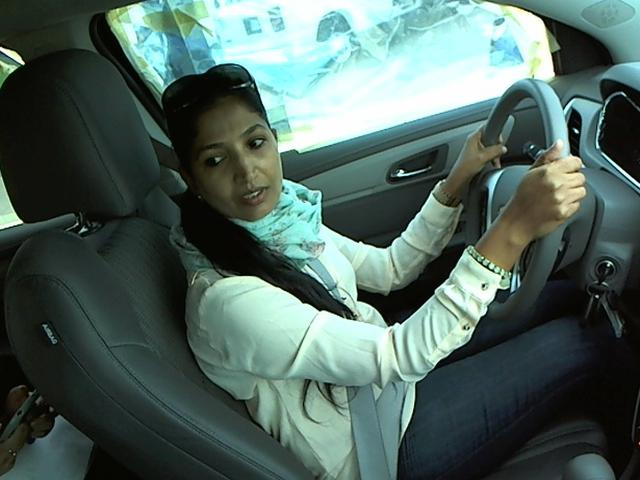

  Proba:
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Min Proba for cls: c0; desc: normal driving; proba: 0.2345; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_48839.jpg:


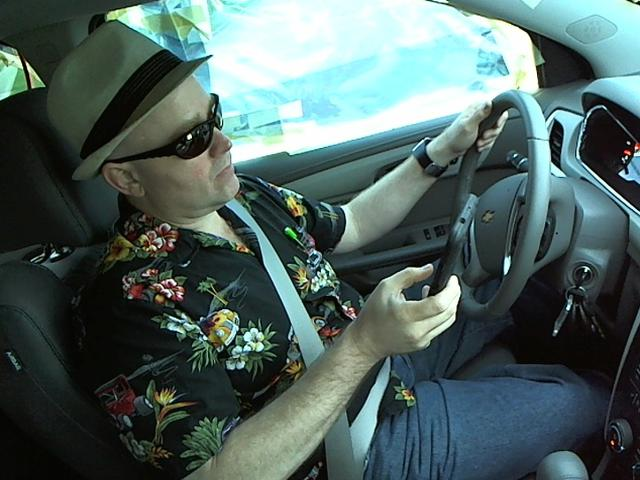

  Proba:
[ 0.2345  0.0771  0.2317  0.2207  0.0579  0.001   0.0613  0.0001  0.0129
  0.1029]
  next best class: talking on the phone - right


Max Proba for cls: c1; desc: texting - right; proba: 1.0000; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_91185.jpg:


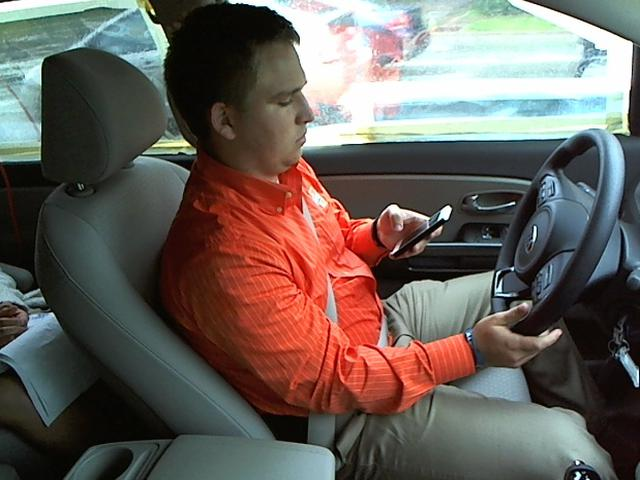

  Proba:
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
Min Proba for cls: c1; desc: texting - right; proba: 0.2005; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_490.jpg:


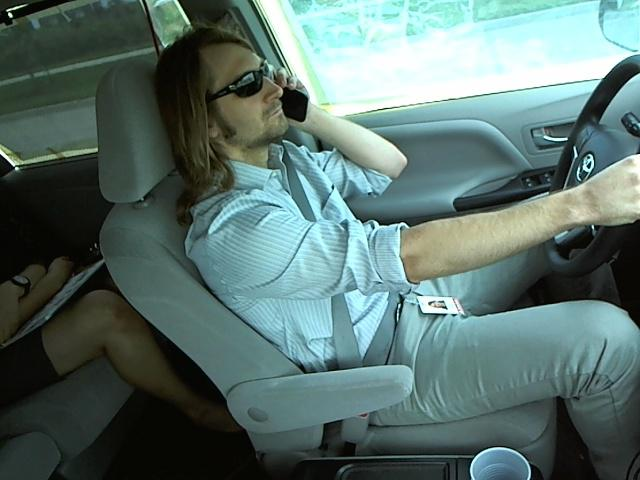

  Proba:
[ 0.0236  0.2005  0.      0.128   0.1182  0.1661  0.1558  0.0005  0.1783
  0.0293]
  next best class: hair and makeup


Max Proba for cls: c2; desc: talking on the phone - right; proba: 1.0000; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_45248.jpg:


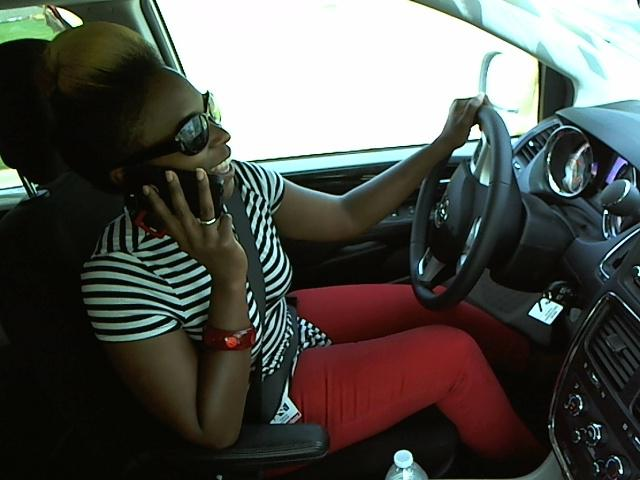

  Proba:
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
Min Proba for cls: c2; desc: talking on the phone - right; proba: 0.2234; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_53769.jpg:


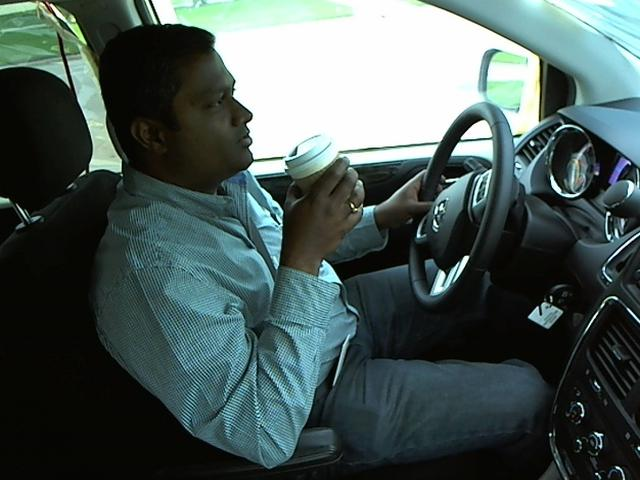

  Proba:
[ 0.1674  0.0464  0.2234  0.0081  0.146   0.0048  0.1542  0.0998  0.007
  0.1426]
  next best class: normal driving


Max Proba for cls: c3; desc: texting - left; proba: 1.0000; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_65853.jpg:


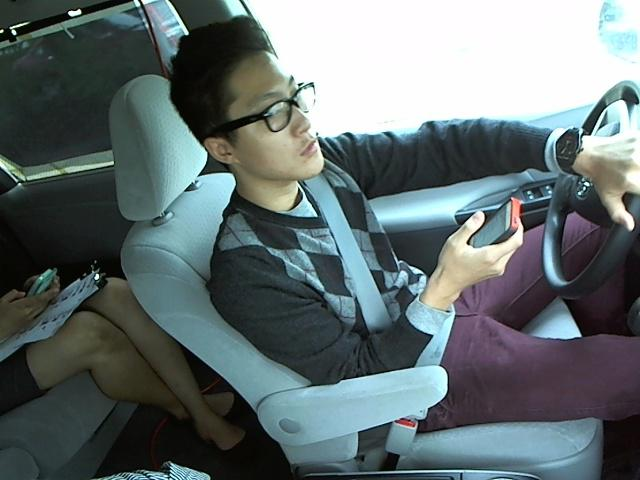

  Proba:
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
Min Proba for cls: c3; desc: texting - left; proba: 0.2278; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_57360.jpg:


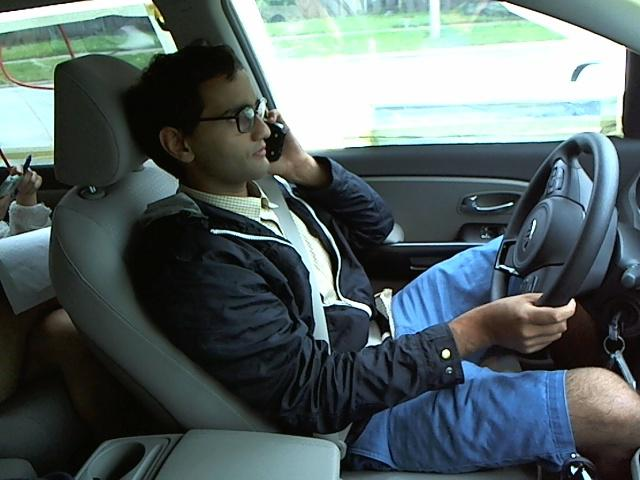

  Proba:
[ 0.0099  0.1661  0.1746  0.2278  0.1476  0.1391  0.1026  0.      0.0322
  0.    ]
  next best class: talking on the phone - right


Max Proba for cls: c4; desc: talking on the phone - left; proba: 1.0000; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_40761.jpg:


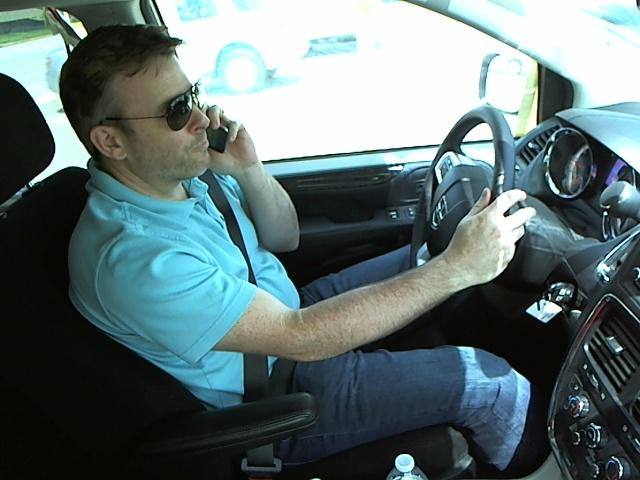

  Proba:
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
Min Proba for cls: c4; desc: talking on the phone - left; proba: 0.2027; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_19776.jpg:


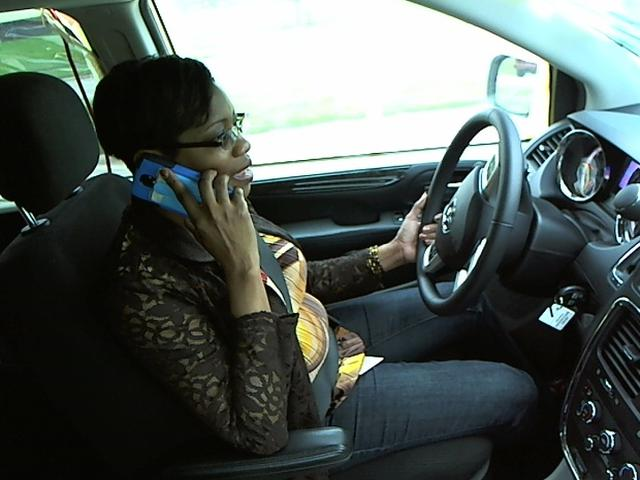

  Proba:
[ 0.0891  0.0716  0.1568  0.008   0.2027  0.0983  0.1471  0.      0.0919
  0.1345]
  next best class: talking on the phone - right


Max Proba for cls: c5; desc: operating the radio; proba: 1.0000; nObsNew: 107
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_100652.jpg:


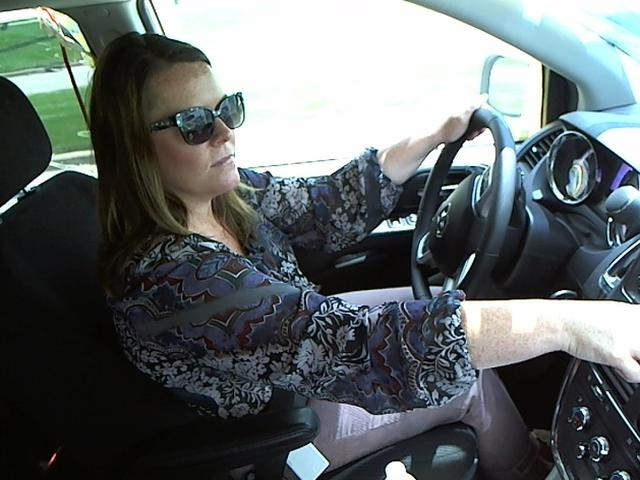

  Proba:
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
Min Proba for cls: c5; desc: operating the radio; proba: 0.2257; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_51092.jpg:


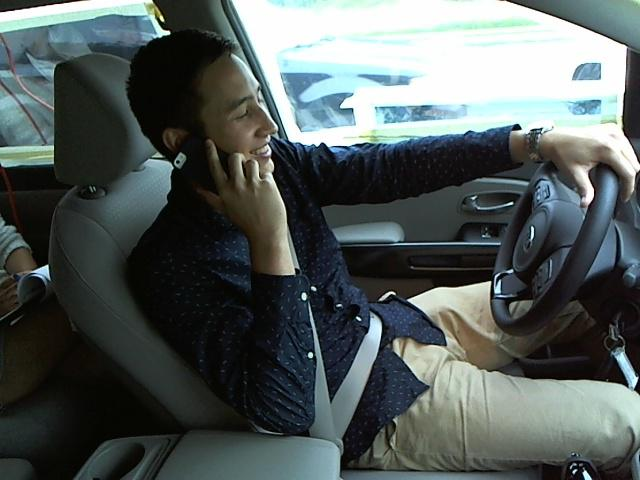

  Proba:
[ 0.0147  0.0629  0.0102  0.1632  0.0045  0.2257  0.2233  0.      0.1055
  0.19  ]
  next best class: drinking


Max Proba for cls: c6; desc: drinking; proba: 1.0000; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_89962.jpg:


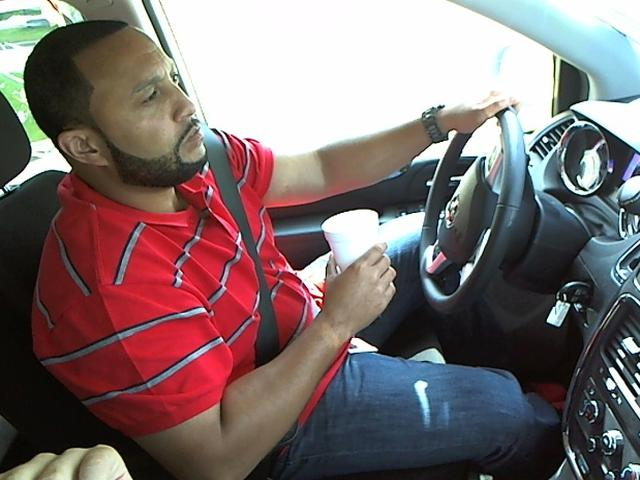

  Proba:
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
Min Proba for cls: c6; desc: drinking; proba: 0.2073; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_13086.jpg:


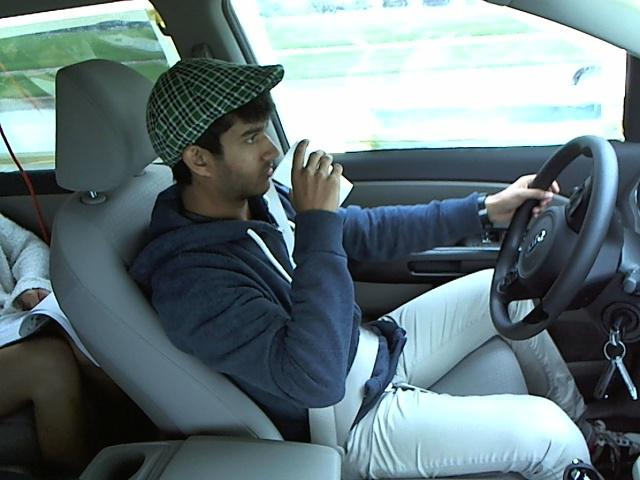

  Proba:
[ 0.1666  0.1501  0.1129  0.1801  0.0016  0.      0.2073  0.0907  0.0216
  0.0691]
  next best class: texting - left


Max Proba for cls: c7; desc: reaching behind; proba: 1.0000; nObsNew: 35
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_100236.jpg:


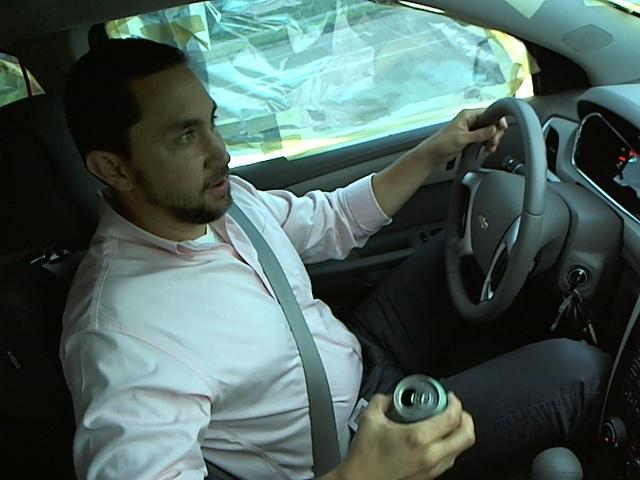

  Proba:
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
Min Proba for cls: c7; desc: reaching behind; proba: 0.2259; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_84684.jpg:


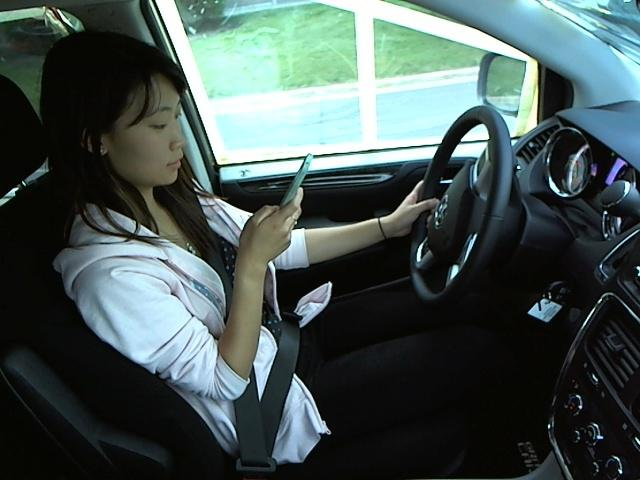

  Proba:
[ 0.      0.2061  0.1067  0.2033  0.0001  0.0011  0.177   0.2259  0.0638
  0.0158]
  next best class: texting - right


Max Proba for cls: c8; desc: hair and makeup; proba: 1.0000; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_46885.jpg:


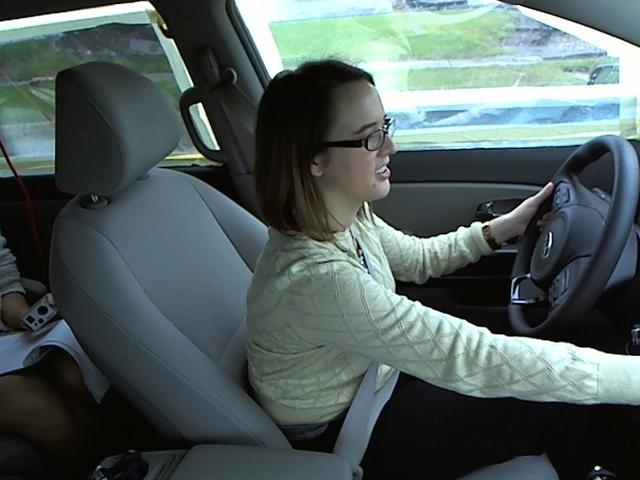

  Proba:
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
Min Proba for cls: c8; desc: hair and makeup; proba: 0.2280; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_54779.jpg:


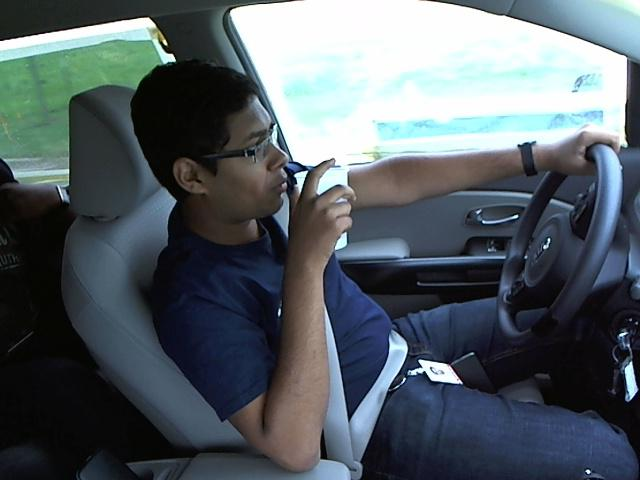

  Proba:
[ 0.0025  0.1558  0.0737  0.002   0.1987  0.      0.1928  0.0064  0.228
  0.1401]
  next best class: talking on the phone - left


Max Proba for cls: c9; desc: talking to passenger; proba: 1.0000; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_32829.jpg:


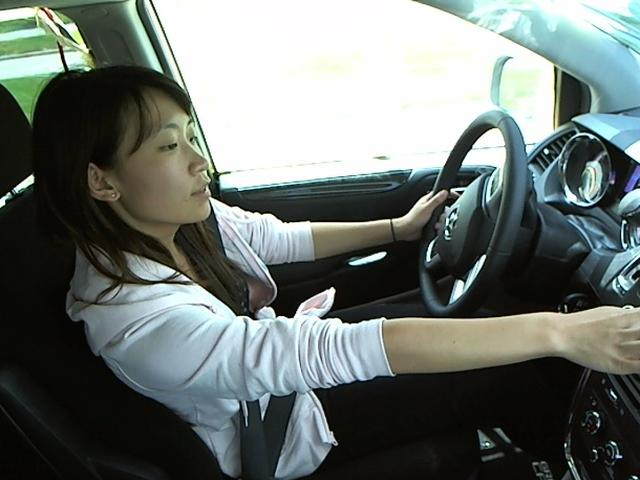

  Proba:
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
Min Proba for cls: c9; desc: talking to passenger; proba: 0.2002; nObsNew: 1
  /Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test/img_27657.jpg:


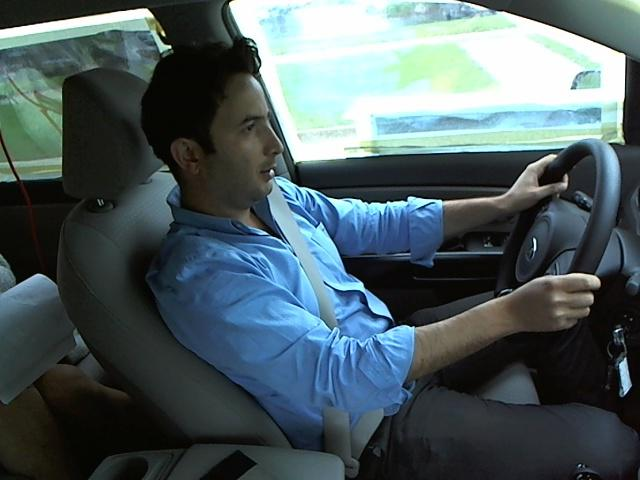

  Proba:
[ 0.1663  0.0047  0.0958  0.1585  0.0029  0.0111  0.0282  0.1939  0.1383
  0.2002]
  next best class: reaching behind


In [131]:
for clsIx, cls in enumerate(glbRspClass):
    clsMsk = glbObsNewRspPred == clsIx
    clsObsNewRspPredProba = glbObsNewRspPredProba[clsMsk, :]
    clsObsNewIdn = [glbObsNewIdn[ixMsk] for ixMsk in xrange(len(glbObsNewIdn)) \
                    if clsMsk[ixMsk]]
    print '\n'
    
    maxClsProba = np.max(clsObsNewRspPredProba[:, clsIx])
    maxObsNewRspPredProba = clsObsNewRspPredProba[:, clsIx] == maxClsProba
    print 'Max Proba for cls: %s; desc: %s; proba: %0.4f; nObsNew: %d' % \
        (cls, glbRspClassDesc[cls], maxClsProba, maxObsNewRspPredProba.sum())
    imgFilePth = os.getcwd() + '/data/' + glbDataFile['newFoldersPth'] + '/' + \
                    clsObsNewIdn[np.argmax(clsObsNewRspPredProba[:, clsIx])]
    print '  %s:' % imgFilePth
    jpgfile = Image(imgFilePth, format = 'jpg', 
                        width = glbImg['size'] * 4, height = glbImg['size'] * 4)
    display(jpgfile)         
    print '  Proba:'; 
    print np.array_str(clsObsNewRspPredProba[np.argmax(clsObsNewRspPredProba[:, clsIx]), :],
                       precision=4, suppress_small=True)
        
    minClsProba = np.min(clsObsNewRspPredProba[:, clsIx])
    minObsNewRspPredProba = clsObsNewRspPredProba[:, clsIx] == minClsProba
    print 'Min Proba for cls: %s; desc: %s; proba: %0.4f; nObsNew: %d' % \
        (cls, glbRspClassDesc[cls], minClsProba, minObsNewRspPredProba.sum())
    imgFilePth = os.getcwd() + '/data/' + glbDataFile['newFoldersPth'] + '/' + \
                    clsObsNewIdn[np.argmin(clsObsNewRspPredProba[:, clsIx])]
    print '  %s:' % imgFilePth
    jpgfile = Image(imgFilePth, format = 'jpg', 
                        width = glbImg['size'] * 4, height = glbImg['size'] * 4)
    display(jpgfile)
    print '  Proba:'; 
    print np.array_str(clsObsNewRspPredProba[np.argmin(clsObsNewRspPredProba[:, clsIx]), :],
                       precision=4, suppress_small=True)
    thsObsNewRspPredProba = clsObsNewRspPredProba[np.argmin(clsObsNewRspPredProba[:, clsIx]), :]
    thsObsNewRspPredProba[clsIx] = 0
    print '  next best class: %s' % \
        (glbRspClassDesc[glbRspClass[np.argmax(thsObsNewRspPredProba)]])

## Output submission

In [132]:
sbmObsNewDf = pd.DataFrame(glbObsNewRspPredProba)
sbmObsNewDf.columns = glbRspClass
sbmObsNewDf['img'] = glbObsNewIdn
sbmObsNewDf = (sbmObsNewDf
                .set_index(['img'], 
                           drop = False)
                .sort_values('img')
                )
sbmObsNewDf = sbmObsNewDf[['img'] + glbRspClass]
print sbmObsNewDf.head()
print sbmObsNewDf.tail()

                           img            c0            c1            c2  \
img                                                                        
img_1.jpg            img_1.jpg  1.022341e-09  1.291037e-13  1.555788e-06   
img_10.jpg          img_10.jpg  2.402234e-06  5.292969e-06  9.821139e-05   
img_100.jpg        img_100.jpg  8.845692e-01  3.524664e-04  2.565228e-06   
img_1000.jpg      img_1000.jpg  1.225707e-02  1.982485e-02  4.778495e-02   
img_100000.jpg  img_100000.jpg  1.405662e-06  4.824674e-07  2.834371e-07   

                          c3            c4            c5            c6  \
img                                                                      
img_1.jpg       1.410185e-14  3.884833e-10  9.999970e-01  1.474044e-06   
img_10.jpg      2.949705e-01  1.301745e-04  7.047829e-01  2.255957e-09   
img_100.jpg     3.062941e-04  1.676451e-04  3.745919e-07  3.374660e-06   
img_1000.jpg    4.757002e-07  8.205907e-01  3.033170e-05  9.736010e-02   
img_100000.jpg  2.27223

In [133]:
sbmObsNewDf.to_csv('img_03_fit_lgtRgrTf_SFDD_sbmt.csv', index = False)

In [134]:
print 'LeaderBoard metric for this submission:%0.5f' % (3.93155)
print 'Best score yet:%s :%0.5f' % \
    ('img_02_fit_lgtRgr_SFDD_sbmt.csv', 2.63892)

LeaderBoard metric for this submission:3.93155
Best score yet:img_02_fit_lgtRgr_SFDD_sbmt.csv :2.63892


## Stop here

Following code should be in img_04_fit_lgtRgrSGDTf_<projectId>

Let's now switch to stochastic gradient descent training instead, which is much faster.

The graph will be similar, except that instead of holding all the training data into a constant node, we create a `Placeholder` node which will be fed actual data at every call of `sesion.run()`.

In [6]:
import pandas as pd
models = pd.DataFrame({'nRELUs': [0]})
#models.ix[0, 'accuracy_scoreTest'] = 0
print models

   nRELUs
0       0


In [7]:
batch_size = 128

graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tfwObsFitFtr = tf.placeholder(tf.float32,
                                    shape=(batch_size, glbImg['size'] * glbImg['size']))
  tfwObsFitRsp = tf.placeholder(tf.float32, shape=(batch_size, glbRspClassN))
  tfwObsVldFtr = tf.constant(glbObsVldFtr)
  tfwObsNewFtr = tf.constant(glbObsNewFtr)
  
  # Variables.
  weights = tf.Variable(
    tf.truncated_normal([glbImg['size'] * glbImg['size'], glbRspClassN]))
  biases = tf.Variable(tf.zeros([glbRspClassN]))
  print(weights.initialized_value())
  print(biases.initialized_value())    
  
  # Training computation.
  logits = tf.matmul(tfwObsFitFtr, weights) + biases
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tfwObsFitRsp))
  
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  tfwObsTrnPred = tf.nn.softmax(logits)
  tfwObsVldPred = tf.nn.softmax(
    tf.matmul(tfwObsVldFtr, weights) + biases)
  tfwObsNewPred = tf.nn.softmax(tf.matmul(tfwObsNewFtr, weights) + biases)

Tensor("Identity:0", shape=TensorShape([Dimension(784), Dimension(10)]), dtype=float32)
Tensor("Identity_1:0", shape=TensorShape([Dimension(10)]), dtype=float32)


Let's run it:

In [8]:
nStepsTfw = 3001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print("Initialized")
  for step in range(nStepsTfw):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    offset = (step * batch_size) % (glbObsFitRsp.shape[0] - batch_size)
    # Generate a minibatch.
    batch_data = glbObsFitFtr[offset:(offset + batch_size), :]
    batch_labels = glbObsFitRsp[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tfwObsFitFtr : batch_data, tfwObsFitRsp : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, tfwObsTrnPred], feed_dict=feed_dict)
    if (step % 500 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy_score: %.1f%%" % accuracy_score(predictions, batch_labels))
      print("Validation accuracy_score: %.1f%%" % accuracy_score(
        tfwObsVldPred.eval(), glbObsVldRsp))
  print("Test accuracy_score: %.1f%%" % accuracy_score(tfwObsNewPred.eval(), glbObsNewRsp))
  models.ix[0, 'accuracy_scoreVld'] = accuracy_score(tfwObsVldPred.eval(), glbObsVldRsp)
  models.ix[0, 'accuracy_scoreTst'] = accuracy_score( tfwObsNewPred.eval(),  glbObsNewRsp)

Initialized
Minibatch loss at step 0: 17.272371
Minibatch accuracy: 6.2%
Validation accuracy: 13.0%
Minibatch loss at step 500: 1.435902
Minibatch accuracy: 76.6%
Validation accuracy: 75.2%
Minibatch loss at step 1000: 1.280029
Minibatch accuracy: 78.1%
Validation accuracy: 77.2%
Minibatch loss at step 1500: 1.147653
Minibatch accuracy: 77.3%
Validation accuracy: 77.2%
Minibatch loss at step 2000: 1.262677
Minibatch accuracy: 72.7%
Validation accuracy: 77.9%
Minibatch loss at step 2500: 0.777248
Minibatch accuracy: 83.6%
Validation accuracy: 77.3%
Minibatch loss at step 3000: 1.085464
Minibatch accuracy: 77.3%
Validation accuracy: 78.6%
Test accuracy: 86.1%


In [9]:
models.ix[0, 'graph'] = graph
print(models)

   nRELUs  accuracyVld  accuracyTst  \
0       0        78.57    86.098056   

                                               graph  
0  <tensorflow.python.framework.ops.Graph object ...  


---
Problem
-------

Turn the logistic regression example with SGD into a 1-hidden layer neural network with rectified linear units (nn.relu()) and 1024 hidden nodes. This model should improve your validation / test accuracy_score.

---

In [10]:
nRELUs = [2 ** thsRelu for thsRelu in xrange(11)]
print(nRELUs)
for thsRelu in nRELUs:
    models.ix[thsRelu, 'nRELUs'] = thsRelu

print models

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
      nRELUs  accuracyVld  accuracyTst  \
0          0        78.57    86.098056   
1          1          NaN          NaN   
2          2          NaN          NaN   
4          4          NaN          NaN   
8          8          NaN          NaN   
16        16          NaN          NaN   
32        32          NaN          NaN   
64        64          NaN          NaN   
128      128          NaN          NaN   
256      256          NaN          NaN   
512      512          NaN          NaN   
1024    1024          NaN          NaN   

                                                  graph  
0     <tensorflow.python.framework.ops.Graph object ...  
1                                                   NaN  
2                                                   NaN  
4                                                   NaN  
8                                                   NaN  
16                                                  NaN  
3

In [49]:
thsRelu = nRELUs[9]
batch_size = 128

graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tfwObsFitFtr = tf.placeholder(tf.float32,
                                    shape=(batch_size, glbImg['size'] * glbImg['size']))
  tfwObsFitRsp = tf.placeholder(tf.float32, shape=(batch_size, glbRspClassN))
  tfwObsVldFtr = tf.constant(glbObsVldFtr)
  tfwObsNewFtr = tf.constant(glbObsNewFtr)
  
  # Variables.
  weights1 = tf.Variable(
    tf.truncated_normal([glbImg['size'] * glbImg['size'], thsRelu]), name = 'weights1')
  biases1 = tf.Variable(tf.zeros([thsRelu]), name = 'biases1')
  weights2 = tf.Variable(
    tf.truncated_normal([thsRelu, glbRspClassN]), name = 'weights2')
  biases2 = tf.Variable(tf.zeros([glbRspClassN]), name = 'biases2')
  print(weights1.initialized_value())
  print(biases1.initialized_value())
  #print(relus.initialized_value())
  print(weights2.initialized_value())
  print(biases2.initialized_value())
  #tf.Print(relus, [relus])  
     
  # Training computation.
  layer1 = tf.matmul(tfwObsFitFtr, weights1) + biases1
  layer2 = tf.nn.relu(layer1)
  layer3 = tf.matmul(layer2, weights2) + biases2
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(layer3, tfwObsFitRsp))
  
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  tfwObsTrnPred = tf.nn.softmax(layer3)
  tfwObsVldPred = tf.nn.softmax(
    tf.matmul(tf.nn.relu(tf.matmul(tfwObsVldFtr, weights1) + biases1), weights2) + biases2)
  tfwObsNewPred = tf.nn.softmax(
    tf.matmul(tf.nn.relu(tf.matmul(tfwObsNewFtr, weights1) + biases1), weights2) + biases2)

Tensor("Identity:0", shape=TensorShape([Dimension(784), Dimension(512)]), dtype=float32)
Tensor("Identity_1:0", shape=TensorShape([Dimension(512)]), dtype=float32)
Tensor("Identity_2:0", shape=TensorShape([Dimension(512), Dimension(10)]), dtype=float32)
Tensor("Identity_3:0", shape=TensorShape([Dimension(10)]), dtype=float32)


In [50]:
nStepsTfw = 3001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print("Initialized")
  for step in range(nStepsTfw):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    offset = (step * batch_size) % (glbObsFitRsp.shape[0] - batch_size)
    # Generate a minibatch.
    batch_data = glbObsFitFtr[offset:(offset + batch_size), :]
    batch_labels = glbObsFitRsp[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tfwObsFitFtr : batch_data, tfwObsFitRsp : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, tfwObsTrnPred], feed_dict=feed_dict)
    if (step % 500 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy_score: %.1f%%" % accuracy_score(predictions, batch_labels))
      print("Validation accuracy_score: %.1f%%" % accuracy_score(
        tfwObsVldPred.eval(), glbObsVldRsp))
  print("Test accuracy_score: %.1f%%" % accuracy_score(tfwObsNewPred.eval(), glbObsNewRsp))
  models.ix[thsRelu, 'accuracy_scoreVld'] = accuracy_score(tfwObsVldPred.eval(), glbObsVldRsp)
  models.ix[thsRelu, 'accuracy_scoreTst'] = accuracy_score( tfwObsNewPred.eval(),  glbObsNewRsp)
  models.ix[thsRelu, 'graph'] = graph
  print(models)

Initialized
Minibatch loss at step 0: 235.251495
Minibatch accuracy: 14.1%
Validation accuracy: 23.9%
Minibatch loss at step 500: 15.635325
Minibatch accuracy: 72.7%
Validation accuracy: 77.7%
Minibatch loss at step 1000: 5.719280
Minibatch accuracy: 83.6%
Validation accuracy: 78.3%
Minibatch loss at step 1500: 3.931793
Minibatch accuracy: 76.6%
Validation accuracy: 75.8%
Minibatch loss at step 2000: 3.211185
Minibatch accuracy: 75.0%
Validation accuracy: 78.1%
Minibatch loss at step 2500: 1.988469
Minibatch accuracy: 80.5%
Validation accuracy: 78.0%
Minibatch loss at step 3000: 3.435107
Minibatch accuracy: 77.3%
Validation accuracy: 79.1%
Test accuracy: 86.7%
      nRELUs  accuracyVld  accuracyTst  \
0          0        78.57    86.098056   
1          1        19.29    19.750053   
2          2        36.26    40.087588   
4          4        64.67    71.122623   
8          8        75.80    82.861568   
16        16        79.74    86.685537   
32        32        76.77    84.28754

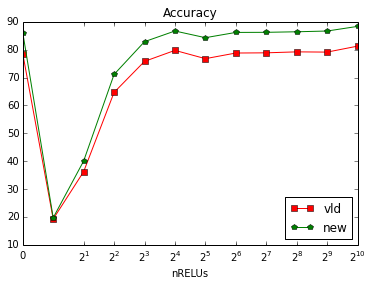

In [52]:
plt.figure()
#plt.plot(models['nRELUs'], models['accuracy_score.fit'], 'bo-', label = 'fit')
plt.plot(models['nRELUs'], models['accuracy_scoreVld'], 'rs-', label = 'vld')
plt.plot(models['nRELUs'], models['accuracy_scoreTst'], 'gp-', label = 'new')
plt.legend(loc = 'lower right')
plt.title("accuracy_score")
plt.xscale('symlog', basex=2)
axes = plt.gca()
axes.set_xlabel('nRELUs')
# axes.set_xlim([mdlDF['l1_penalty'][mdlDF['RSS.vld'].argmin()] / 10 ** 2, \
#                mdlDF['l1_penalty'][mdlDF['RSS.vld'].argmin()] * 10 ** 2])
# axes.set_ylim([0, mdlDF['RSS.vld'].min() * 1.5])
plt.show()